In [1]:
import pandas as pd
import numpy as np

In [2]:
mlm_5m_df = pd.read_csv('../5M-MLM/runs_with_eval_loss_and_params.csv')
mtr_5m_df = pd.read_csv('../5M-MTR/runs_with_eval_loss_and_params.csv')
nparams_df = pd.read_csv('../5M-MLM/runs_with_param_numbers.csv')

In [3]:
mlm_5m_df.rename({'min_eval_loss': 'mlm_eval_loss'}, axis=1, inplace=True)
mtr_5m_df.rename({'min_eval_loss': 'mtr_eval_loss'}, axis=1, inplace=True)

In [4]:
from scipy.stats import kendalltau

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')

In [7]:
comb_df = mlm_5m_df.merge(mtr_5m_df[['run_name', 'mtr_eval_loss']], on='run_name').merge(nparams_df, on='run_name').drop('pretraining_task', axis=1)

In [8]:
comb_df['log_learning_rate'] = np.log10(comb_df.learning_rate)

In [9]:
comb_df.head()

,run_name,mlm_eval_loss,hidden_size,attention_probs_dropout_prob,hidden_dropout_prob,intermediate_size,num_attention_heads,num_hidden_layers,learning_rate,mtr_eval_loss,num_parameters,log_learning_rate
0,run_35,1.095143,224,0.238,0.178,7900,8,5,1.759891e-07,0.617307,19050382,-6.754514
1,run_22,0.548167,704,0.208,0.268,2028,11,5,2.124749e-07,0.471555,25516062,-6.672692
2,run_18,0.450905,51,0.130,0.215,6456,3,9,8.398255e-06,0.542636,6142253,-5.075811
3,run_41,1.062962,126,0.207,0.051,11016,7,3,3.056263e-07,0.574383,8712182,-6.514809
4,run_46,0.636933,246,0.150,0.236,12144,6,5,6.927616e-07,0.567294,31492634,-6.159416


In [10]:
mlm_ranks = np.argsort(comb_df.mlm_eval_loss.values)

In [11]:
mtr_ranks = np.argsort(comb_df.mtr_eval_loss.values)

In [12]:
kendalltau(mlm_ranks, mtr_ranks)

KendalltauResult(correlation=0.5704125177809389, pvalue=4.6229822629441497e-07)

In [13]:
mlm_corr = comb_df.corrwith(comb_df.mlm_eval_loss, drop=True).dropna().sort_values()
mlm_corr.drop(['mlm_eval_loss', 'mtr_eval_loss', 'learning_rate'], inplace=True)

In [14]:
mlm_corr

hidden_size                    -0.275616
num_attention_heads            -0.206018
attention_probs_dropout_prob   -0.164583
hidden_dropout_prob            -0.141460
num_parameters                 -0.006461
intermediate_size               0.206512
num_hidden_layers               0.226090
log_learning_rate               0.528753
dtype: float64

/home/ubuntu/miniconda/envs/reverie_env_new/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Correlation with Eval Loss')

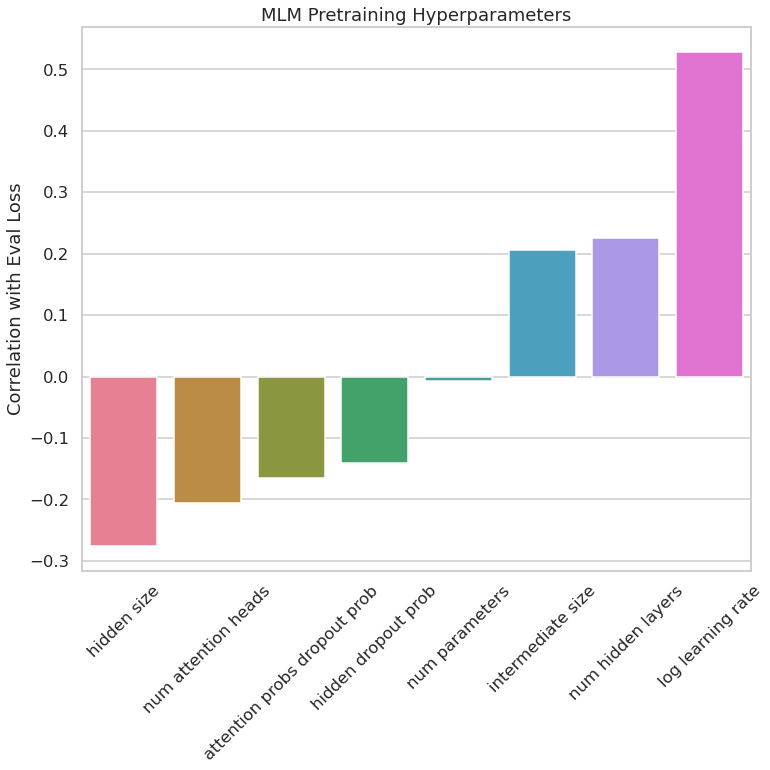

In [15]:
plt.figure(figsize=(12, 10))
sns.barplot([' '.join(s.split('_')) for s in mlm_corr.index], mlm_corr.values, palette='husl')
plt.xticks(rotation=45)
plt.title('MLM Pretraining Hyperparameters')
plt.ylabel('Correlation with Eval Loss')
# plt.savefig('mlm_hparam_corrs.png', dpi=200, bbox_inches='tight')

In [16]:
mtr_corr = comb_df.corrwith(comb_df.mtr_eval_loss).dropna().sort_values()
mtr_corr.drop(['mlm_eval_loss', 'mtr_eval_loss', 'learning_rate'], inplace=True)

/home/ubuntu/miniconda/envs/reverie_env_new/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Correlation with Eval Loss')

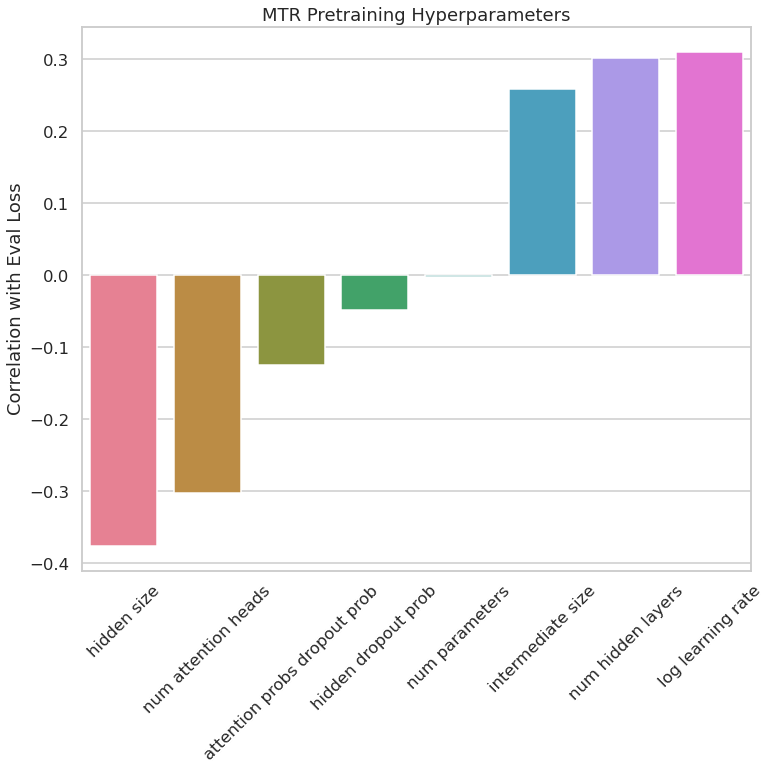

In [17]:
plt.figure(figsize=(12, 10))
sns.barplot([' '.join(s.split('_')) for s in mtr_corr.index], mtr_corr.values, palette='husl')
plt.xticks(rotation=45)
plt.title('MTR Pretraining Hyperparameters')
plt.ylabel('Correlation with Eval Loss')
# plt.savefig('mtr_hparam_corrs.png', bbox_inches='tight')

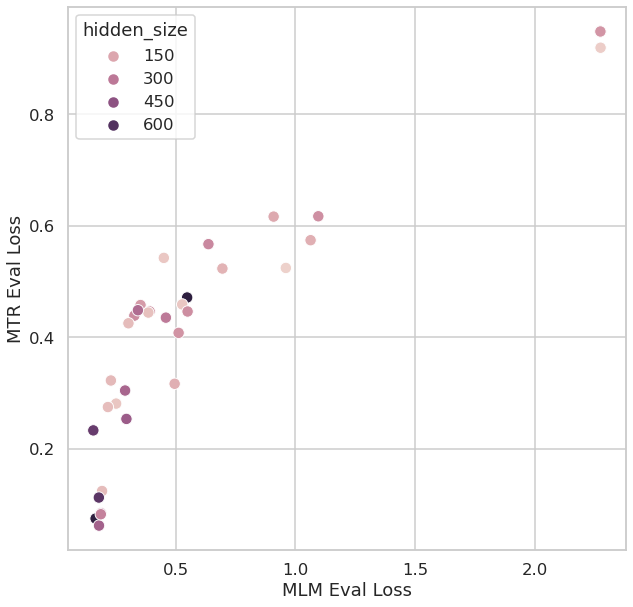

In [107]:
sns.scatterplot(data=comb_df, x='mlm_eval_loss', y='mtr_eval_loss', hue='hidden_size', s=130)
plt.xlabel('MLM Eval Loss')
plt.ylabel('MTR Eval Loss')
plt.savefig('hidden_size_eval_loss.png', dpi=250)

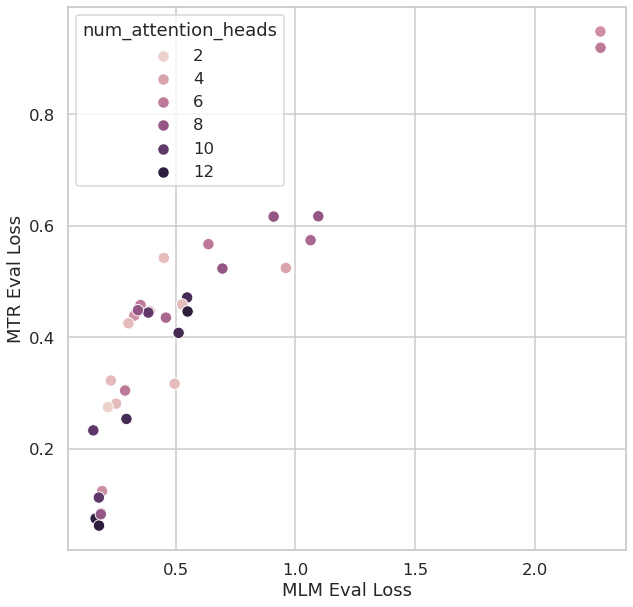

In [77]:
sns.scatterplot(data=comb_df, x='mlm_eval_loss', y='mtr_eval_loss', hue='num_attention_heads', s=130)
plt.xlabel('MLM Eval Loss')
plt.ylabel('MTR Eval Loss')
plt.savefig('attention_heads_eval_loss.png', dpi=250)


Text(0, 0.5, 'MTR Eval Loss')

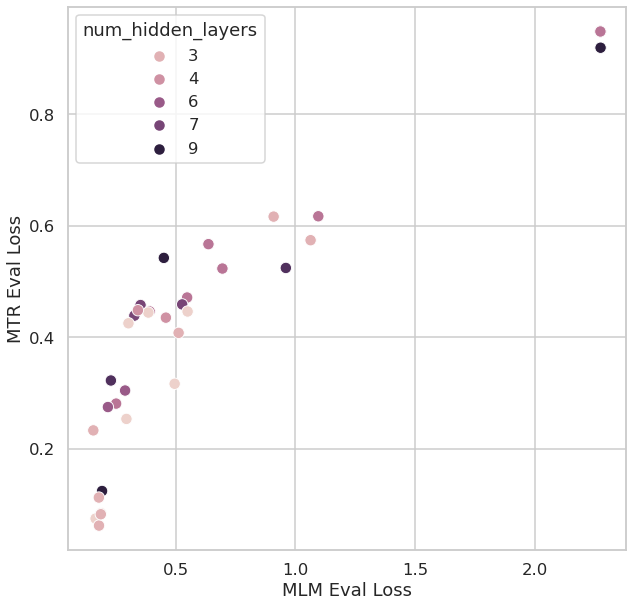

In [78]:
sns.scatterplot(data=comb_df, x='mlm_eval_loss', y='mtr_eval_loss', hue='num_hidden_layers', s=130)
plt.xlabel('MLM Eval Loss')
plt.ylabel('MTR Eval Loss')
# plt.savefig('attention_heads_eval_loss.png', dpi=250)

Text(0, 0.5, 'MTR Eval Loss')

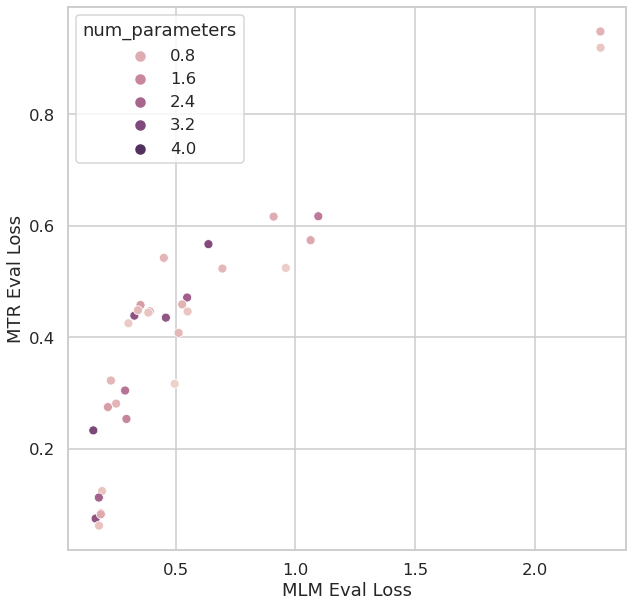

In [37]:
sns.scatterplot(data=comb_df, x='mlm_eval_loss', y='mtr_eval_loss', hue='num_parameters')
plt.xlabel('MLM Eval Loss')
plt.ylabel('MTR Eval Loss')
# plt.savefig('attention_heads_eval_loss.png', dpi=250)


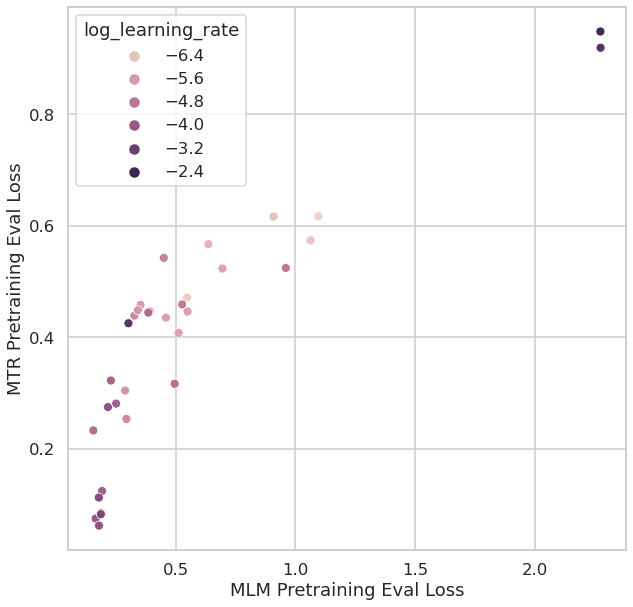

In [18]:
sns.scatterplot(data=comb_df, x='mlm_eval_loss', y='mtr_eval_loss', hue='log_learning_rate')
plt.xlabel('MLM Pretraining Eval Loss')
plt.ylabel('MTR Pretraining Eval Loss')
plt.savefig('lr_eval_loss.png', dpi=250)


<AxesSubplot:xlabel='num_hidden_layers', ylabel='mtr_eval_loss'>

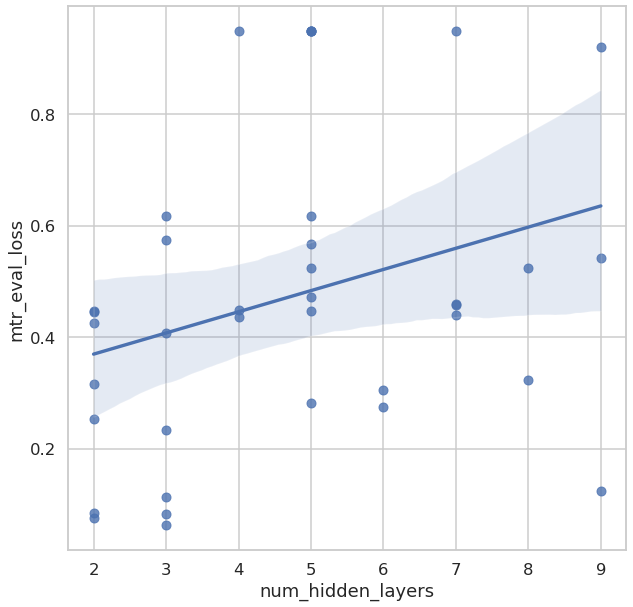

In [93]:
sns.regplot(data=comb_df, x='num_hidden_layers', y='mtr_eval_loss')

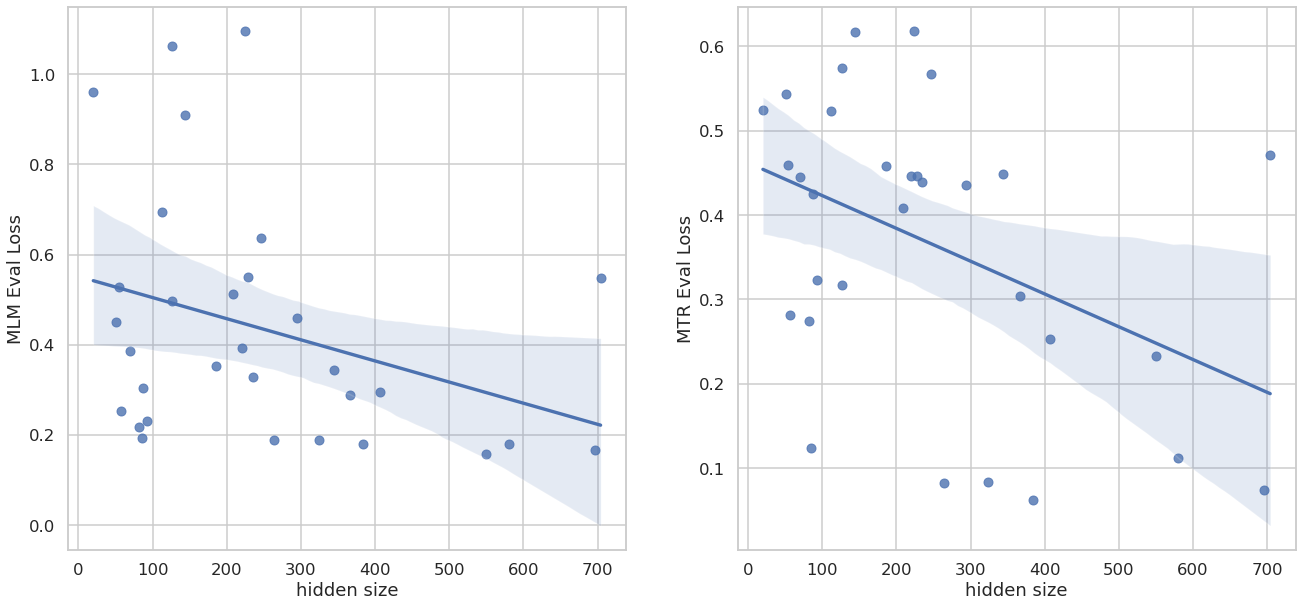

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(22, 10))

sns.regplot(data=comb_df[comb_df.mlm_eval_loss <= 2.0], x='hidden_size', y='mlm_eval_loss', ax=ax[0])
ax[0].set_ylabel('MLM Eval Loss')
ax[0].set_xlabel('hidden size')
sns.regplot(data=comb_df[comb_df.mlm_eval_loss <= 2.0], x='hidden_size', y='mtr_eval_loss', ax=ax[1])
ax[1].set_ylabel('MTR Eval Loss')
ax[1].set_xlabel('hidden size')
plt.savefig('hs_v_loss.png', dpi=200)

<AxesSubplot:xlabel='num_hidden_layers', ylabel='mlm_eval_loss'>

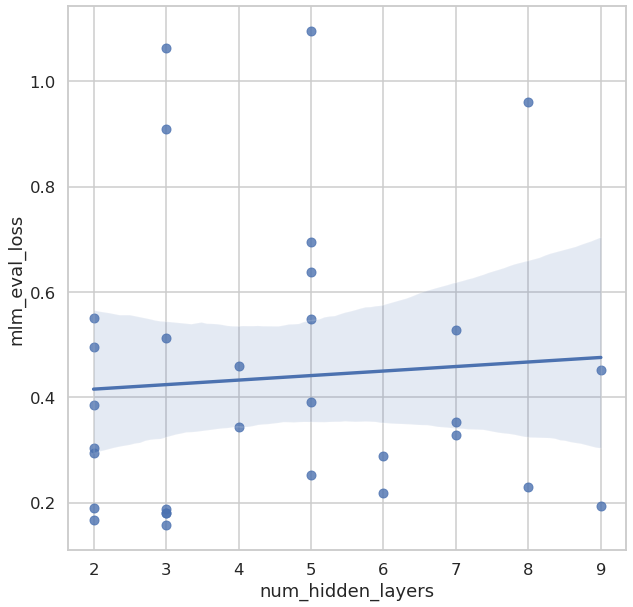

In [100]:
sns.regplot(data=comb_df[comb_df.mlm_eval_loss <= 2.0], x='num_hidden_layers', y='mlm_eval_loss')

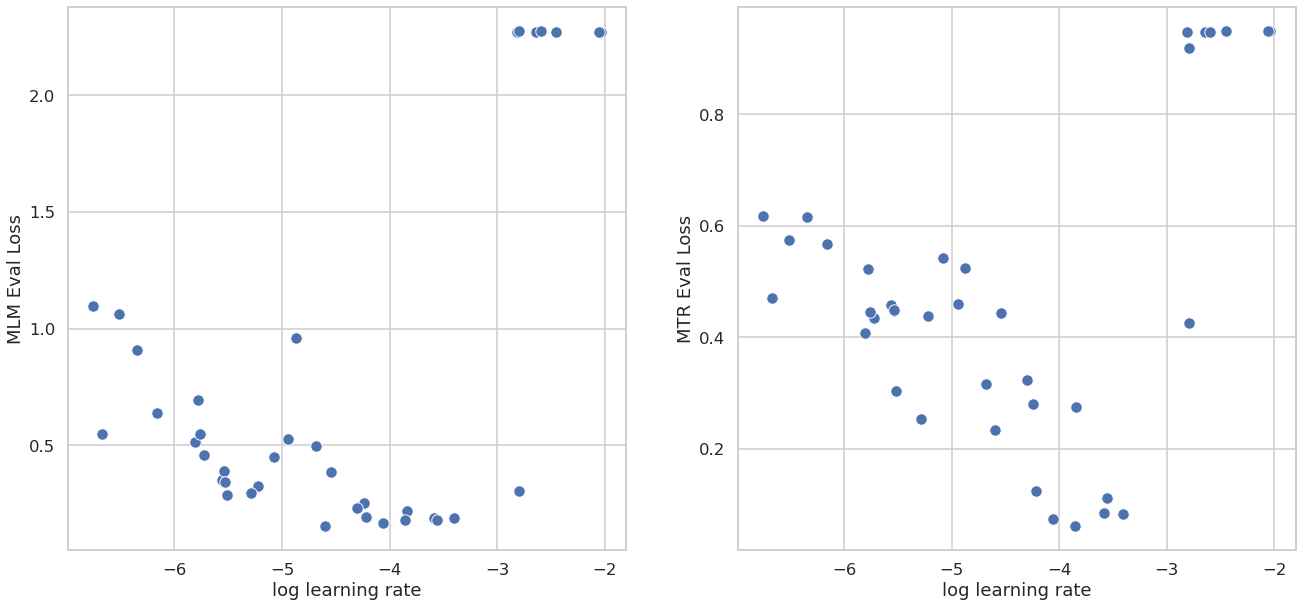

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(22, 10))
sns.scatterplot(data=comb_df, x='log_learning_rate', y='mlm_eval_loss', s=130, ax=ax[0])
sns.scatterplot(data=comb_df, x='log_learning_rate', y='mtr_eval_loss', s=130, ax=ax[1])
ax[0].set_ylabel('MLM Eval Loss')
ax[0].set_xlabel('log learning rate')
ax[1].set_ylabel('MTR Eval Loss')
ax[1].set_xlabel('log learning rate')
plt.savefig('lr_v_loss.png', dpi=200)

<AxesSubplot:xlabel='hidden_size', ylabel='log_learning_rate'>

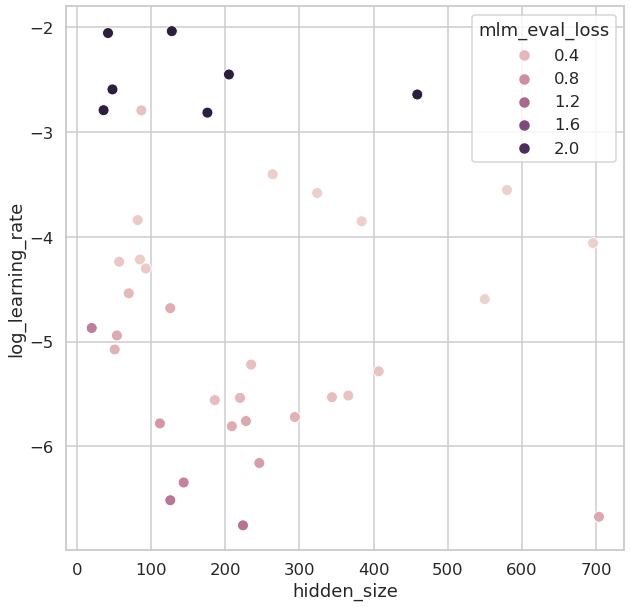

In [54]:
sns.scatterplot(data=comb_df, x='hidden_size', y='log_learning_rate', s=120, hue='mlm_eval_loss')